In [3]:
import os
import pandas as pd
import re
import jieba
from functools import reduce
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic

In [4]:
database_path = 'D:/JupyterWorkspace/wikiextractor/extracted/AA/result.txt'

os.path.exists(database_path)

database = open(database_path, 'r', encoding='utf-8')
all_articles = database.read()
database.close()

In [4]:
#all_articles = re.sub('<(.*)>', '@', all_articles)

In [13]:
#test = all_articles.split('@\n@')

In [7]:
re.findall('<(.*)>', all_articles)

['doc id="13" url="https://zh.wikipedia.org/wiki?curid=13" title="数学"',
 '/doc',
 'doc id="18" url="https://zh.wikipedia.org/wiki?curid=18" title="哲学"',
 '/doc',
 'doc id="21" url="https://zh.wikipedia.org/wiki?curid=21" title="文学"',
 '/doc',
 'doc id="22" url="https://zh.wikipedia.org/wiki?curid=22" title="历史"',
 '/doc',
 'doc id="25" url="https://zh.wikipedia.org/wiki?curid=25" title="计算机科学"',
 '/doc',
 'doc id="39" url="https://zh.wikipedia.org/wiki?curid=39" title="民族"',
 '/doc',
 'doc id="45" url="https://zh.wikipedia.org/wiki?curid=45" title="戏剧"',
 '/doc',
 'doc id="48" url="https://zh.wikipedia.org/wiki?curid=48" title="电影"',
 '/doc',
 'doc id="51" url="https://zh.wikipedia.org/wiki?curid=51" title="音乐"',
 'br',
 '/doc',
 'doc id="53" url="https://zh.wikipedia.org/wiki?curid=53" title="经济学"',
 '/doc',
 'doc id="56" url="https://zh.wikipedia.org/wiki?curid=56" title="政治学"',
 '/doc',
 'doc id="57" url="https://zh.wikipedia.org/wiki?curid=57" title="法学"',
 '/doc',
 'doc id="59" ur

In [5]:
all_articles = re.sub('<(.*)>', '', all_articles)

In [6]:
all_articles[:100]

'\n数学\n\n数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于形式科学的一种。数学透过抽象化和逻辑推理的使用，由计数、计算、量度和对物体形状及运动的观察而产生。数学家们拓展'

In [7]:
def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))

In [8]:
text = token(all_articles)

In [9]:
len(text)

5441862

In [10]:
TEXT = text

In [11]:
def cut(string): return list(jieba.cut(string))

In [12]:
ALL_TOKENS = cut(TEXT)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Maver1ck\AppData\Local\Temp\jieba.cache
Loading model cost 2.003 seconds.
Prefix dict has been built succesfully.


In [13]:
len(ALL_TOKENS)

3087857

In [14]:
for t in ALL_TOKENS[:10]:
    print(t)

数学
 
数学
是
利用
符号语言
研究
数量
 
结构


In [15]:
for t in ALL_TOKENS[:10]:
    if t.strip() and t != 'n':
        print(t)

数学
数学
是
利用
符号语言
研究
数量
结构


In [16]:
valid_tokens = [t for t in ALL_TOKENS if t.strip() and t != 'n']

In [17]:
len(valid_tokens)

2555948

In [18]:
valid_tokens[:20]

['数学',
 '数学',
 '是',
 '利用',
 '符号语言',
 '研究',
 '数量',
 '结构',
 '变化',
 '以及',
 '空间',
 '等',
 '概念',
 '的',
 '一门',
 '学科',
 '从',
 '某种',
 '角度看',
 '属于']

In [19]:
words_count = Counter(valid_tokens)

In [20]:
words_count.most_common(10)

[('的', 153118),
 ('在', 38504),
 ('年', 29037),
 ('是', 28010),
 ('和', 26954),
 ('了', 18389),
 ('为', 17288),
 ('有', 14391),
 ('与', 14076),
 ('也', 11609)]

In [21]:
frequences = [f for w,f in words_count.most_common(100)]

In [22]:
x = [i for i in range(len(frequences[:100]))]

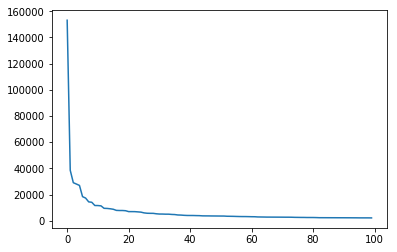

In [23]:
%matplotlib inline
plt.plot(x, frequences)

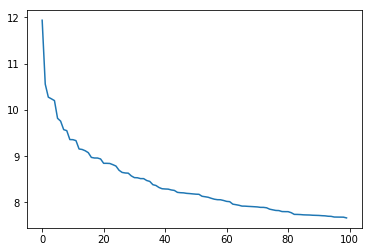

In [24]:
plt.plot(x, np.log(frequences))

In [25]:
frequences_all = [f for w, f in words_count.most_common()]
frequences_sum = sum(frequences_all)
frequences_sum

2555948

In [26]:
1 / frequences_sum

3.9124426631527717e-07

In [27]:
def get_prob(word):
    esp = 1 / frequences_sum
    if word in words_count:
        return words_count[word] / frequences_sum
    else:
        return esp

In [28]:
def product(numbers):
    return reduce(lambda n1,n2: n1*n2, numbers)

In [29]:
def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])

In [30]:
language_model_one_gram('数学是一门哲学')

4.1762001922848586e-14

In [33]:
sentences = """
数学是一门哲学
数学是一门文学
""".split()

In [34]:
for s in sentences:
    print(s, language_model_one_gram(s))

数学是一门哲学 4.1762001922848586e-14
数学是一门文学 3.5919649322242826e-14


In [35]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 2.186648104208541e-52
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 3.0936500509702834e-52
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.923951322691115e-26
---- 真是一只好看的小猫 with probility 3.942077355795059e-23
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 3.781663079835759e-26
---- 今晚我去吃火锅 with probility 9.66573418558005e-20


In [36]:
valid_tokens = [str(t) for t in valid_tokens]

In [38]:
all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]

In [39]:
#test
all_2_grams_words[:100]

['数学数学',
 '数学是',
 '是利用',
 '利用符号语言',
 '符号语言研究',
 '研究数量',
 '数量结构',
 '结构变化',
 '变化以及',
 '以及空间',
 '空间等',
 '等概念',
 '概念的',
 '的一门',
 '一门学科',
 '学科从',
 '从某种',
 '某种角度看',
 '角度看属于',
 '属于形式',
 '形式科学',
 '科学的',
 '的一种',
 '一种数学',
 '数学透过',
 '透过抽象化',
 '抽象化和',
 '和逻辑推理',
 '逻辑推理的',
 '的使用',
 '使用由',
 '由计数',
 '计数计算',
 '计算量度',
 '量度和',
 '和对',
 '对物体',
 '物体形状',
 '形状及',
 '及运动',
 '运动的',
 '的观察',
 '观察而',
 '而产生',
 '产生数学家',
 '数学家们',
 '们拓展',
 '拓展这些',
 '这些概念',
 '概念为了',
 '为了公式化',
 '公式化新',
 '新的',
 '的猜想',
 '猜想以及',
 '以及从',
 '从选定',
 '选定的',
 '的公理',
 '公理及',
 '及定义',
 '定义中',
 '中建立',
 '建立起',
 '起严谨',
 '严谨推导',
 '推导出',
 '出的',
 '的定理',
 '定理基础',
 '基础数学',
 '数学的',
 '的知识',
 '知识与',
 '与运用',
 '运用总是',
 '总是个人',
 '个人与',
 '与团体',
 '团体生活',
 '生活中',
 '中不可或缺',
 '不可或缺的',
 '的一环',
 '一环对',
 '对数学',
 '数学基本概念',
 '基本概念的',
 '的完善',
 '完善早',
 '早在',
 '在古埃及',
 '古埃及美索不达米亚',
 '美索不达米亚及',
 '及古印度',
 '古印度内',
 '内的',
 '的古代',
 '古代数学',
 '数学文本']

In [40]:
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

def get_combination_prob(w1, w2):
    if w1 + w2 in _2_gram_counter: return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1 / _2_gram_sum

In [41]:
get_combination_prob('人工', '智能')

3.9124457245966854e-07

In [45]:
def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)

In [46]:
get_prob_2_gram('人工', '智能')

0.012048202198664395

In [47]:
def language_model_of_2_gram(sentence):
    sentence_probability = 1
    
    words = cut(sentence)
    
    for i, word in enumerate(words):
        if i == 0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
            
    return sentence_probability

In [48]:
language_model_of_2_gram('小明今天抽奖抽到一台苹果手机')

2.334000102519366e-13

In [ ]:
language_model_of_2_gram('小明今天抽奖抽到一台苹果手机')